# Data Fetching from Jobs.ge and Analysis

In [143]:
import requests
from scrapy.http import TextResponse
import pandas as pd
from selenium import webdriver
import time
from selenium.webdriver.common.keys import Keys
from textblob import TextBlob, Word
import nltk
from nltk.corpus import stopwords, words
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style 

In [2]:
browser=webdriver.Safari()

In [3]:
url='https://jobs.ge/en'
browser.get(url)

In [4]:
page=browser.page_source
response=TextResponse(url=url,body=page,encoding='utf-8')

In [5]:
response.css('a.vip::text').extract()[:5]

['Payroll Manager',
 'Sales Consultant',
 'Sales Consultant',
 'Barista, Waitress',
 'Various']

In [6]:
#scrolling down to fetch data from all sources
while True: 
    old_length = len(browser.page_source)
    some_element = browser.find_element_by_tag_name("html")
    time.sleep(2)
    some_element.send_keys(Keys.END)
    time.sleep(2)
    new_length = len(browser.page_source)
    print(new_length)
    if new_length==old_length:
        break

551549
789888
1027031
1262393
1496017
1728118
1959530
2195846
2307364
2307364


In [7]:
page=browser.page_source
response=TextResponse(url=url,body=page,encoding='utf-8')

In [8]:
jobs = response.css('td:nth-child(2) > a::text').extract()
companies=response.css('td:nth-child(4) > a::text').extract()

In [9]:
print(len(companies))
print(len(jobs))

2631
2841


The lengths are different because some companies are stored in another tag. Fetching data using pandas read_html() will be attempted.

In [10]:
tb=pd.read_html(browser.page_source) #creating a table/dataframe
tb=tb[4]
tb.head()

,Unnamed: 0,Standart Advertisements,Unnamed: 2,Provided By,Published,Deadline
0,NaN,Manicure Specialist,NaN,Nail Salon,15 August,15 September
1,NaN,Cashier,NaN,Market,15 August,15 September
2,NaN,Master Data Administrator,NaN,HeidelbergCement,15 August,15 September
3,NaN,Marketing Manager,NaN,Bakur Sulakauri Publishing,15 August,26 August
4,NaN,Marketing Manager,NaN,Bakur Sulakauri Publishing,15 August,26 August


In [11]:
tb=tb.drop(['Unnamed: 0','Unnamed: 2','Published','Deadline'],axis=1)

In [12]:
tb=tb.rename(columns={"Standart Advertisements":"Position","Provided By":"Company"})

In [13]:
tb[:5]

,Position,Company
0,Manicure Specialist,Nail Salon
1,Cashier,Market
2,Master Data Administrator,HeidelbergCement
3,Marketing Manager,Bakur Sulakauri Publishing
4,Marketing Manager,Bakur Sulakauri Publishing


In [14]:
tb.Position.value_counts()[:20]

Sales Consultant        64
Sales Manager           62
Various                 44
Driver                  37
Cleaner                 37
Waiter/Waitress         35
Administrator           35
Cashier                 31
Call Center Operator    30
Accountant              27
Cook                    24
Preseller               22
Operator                21
Courier                 20
Security Staff          20
Consultant              20
Cleaning Staff          19
Internship              18
Cashier/Salesperson     17
Distributor             17
Name: Position, dtype: int64

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(df..value_counts()[:10].index,df.Category.value_counts()[:10],palette='GnBu_d')
style.use("fivethirtyeight")
plt.xticks(rotation=40, fontsize=15)
plt.yticks(fontsize=15)
plt.title("Top 10 Job Categories in Jobs.ge",fontsize=25)
plt.xlabel("Category",fontsize=15)
plt.ylabel("Count")
plt.show()

# Text mining of Job Titles

In [17]:
titles_string=''.join(tb.Position.to_list())
title_blob=TextBlob(titles_string)
title_blob.words[:10]

WordList(['Manicure', 'SpecialistCashierMaster', 'Data', 'AdministratorMarketing', 'ManagerMarketing', 'ManagerMarketing', 'ManagerSales', 'ConsultantSales', 'Manager', 'OfficeSales'])

In [85]:
sw = stopwords.words('english') #stopwords in english

In [101]:
all_words=[i for i in title_blob.words.lower() if i not in sw and i!='tbilisi']
all_words=pd.Series(all_words)
all_words.value_counts()[:10] #the most frequent word in job postings is manager

manager         70
sales           66
center          49
expert          43
speaking        37
loan            31
officer         29
service         27
consultant      22
managersales    21
dtype: int64

In [215]:
freq=nltk.FreqDist(all_words)

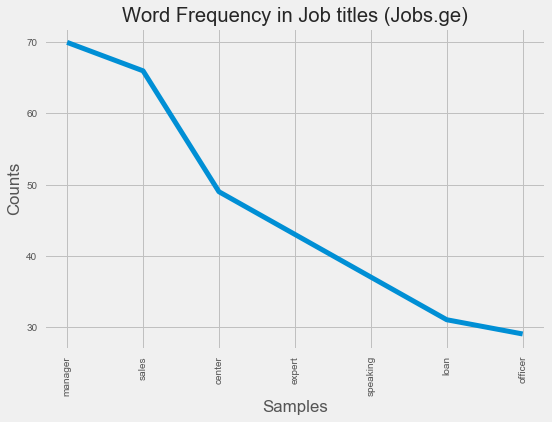

In [287]:
freq.plot(7,title='Word Frequency in Job titles (Jobs.ge)',linewidth=5)
# freq.set_xticklabels('Titles', rotation=0, fontsize=8)
#freq.set_yticklabels('Count', rotation=0, fontsize=20)

# Creating "category" variable by keyword

In [25]:
tb['Category']='Category' #creating Category columns

In [27]:
tb.loc[tb.Position.str.contains('(?i)Manage|Product|Lead|Head|Director|project|scrum'),"Category"]='Product/Project Management'

In [28]:
tb.loc[tb.Position.str.contains('(?i)Travel|Hostess|guest|stew|hoste|reserv'),"Category"]='Tourism'
tb.loc[tb.Position.str.contains('(?i)Teacher|Lecturer|Professor|Train|Educat|instru'),"Category"]='Education/Training'
tb.loc[tb.Position.str.contains('(?i)Market|Research|Analyst'),"Category"]='Research/Analytics'

In [29]:
tb.loc[tb.Position.str.contains('(?i)Content|writ'),"Category"]='Conent Writing'

In [30]:
tb.loc[tb.Position.str.contains('(?i)Software|Developer|Technic|DevOps|Engin|Programm'),"Category"]='Software Development'

In [31]:
tb.loc[tb.Position.str.contains('(?i)Consult'),"Category"]='Consultancy'
tb.loc[tb.Position.str.contains('(?i)data'),"Category"]='Data Analytics'
tb.loc[tb.Position.str.contains('(?i)Financ|Account|Audit|Grant'),"Category"]='Finance/Accounting'

In [32]:
tb.loc[tb.Position.str.contains('(?i)Doctor|Pharmacist|Therap|Nurs|Health|Safety|Medic|Surge|ogist'),"Category"]='Medicine/Pharmaceutics'
tb.loc[tb.Position.str.contains('(?i)Loan|Bank|Invest|Capital|Credit'),"Category"]='Banking/Investment'

In [33]:
tb.loc[tb.Position.str.contains('(?i)Ling|Transl|Interpr|Language'),"Category"]='Linguistics/Translation'
tb.loc[tb.Position.str.contains('(?i)PR/Marketing|Communic|Media|Social|Seo|Journal|Advert'),"Category"]='Marketing/PR'

In [59]:
tb.loc[tb.Position.str.contains('(?i)Business|Operati|HR|Resource|Suppl|Chain|Insur|Logist|Solut|Card|Dispatch|Tender'),"Category"]='Business Operations'

In [260]:
df.loc[df.Position.str.contains('(?i)Business|Operation|HR|Resource|Suppl|Chain|Insur|Logist|Solut|Card|Tender'),"Category"]='Business Operations'

In [35]:
tb.loc[tb.Position.str.contains('(?i)IT/quality|Control|Security|Inspec|QA|Install'),"Category"]='Quality Assurance/IT'

In [36]:
tb.loc[tb.Position.str.contains('(?i)House|Clean|keep|Guard|Driver|Cook|Labor|Bake|Vari|Car|Wash'),"Category"]='Other'

In [37]:
tb.loc[tb.Position.str.contains('(?i)Design|UI|Architect|Styl|Edit|Anim'),"Category"]='Art/Design/Architecture'

In [38]:
tb.loc[tb.Position.str.contains('(?i)Law|legal'),"Category"]='Legal'
tb.loc[tb.Position.str.contains('(?i)Sale|Broker|vend'),"Category"]='Sales'

In [270]:
df.loc[tb.Position.str.contains('(?i)Support|Operat|Customer|Seller|Call|Bar|Operator|Cashier|Courie|Deliver|Coordinat|Recepti|Distr|Represent|Load|Care|Bell|Merch|Assist|Promot|Agent|Administrator'),"Category"]='Services'

In [40]:
tb.loc[tb.Position.str.contains('(?i)Chef|Sandw|Food|Restaur|Waiter|Waitress|Bar'),"Category"]='Restaurant/Culinary'

In [61]:
df.loc[tb.Position.str.contains('(?i)Business|Operat|HR|Resource|Suppl|Chain|Insur|Logist|Solut|Card|Dispatch|Tender'),"Category"]='Business Operations'

In [44]:
df = tb[tb.Category != 'Other'] #deleting irrelevant job categories
df = df[df.Category != 'Category']

In [296]:
len(df.Category.value_counts()) #checking the proportion of each job category

20

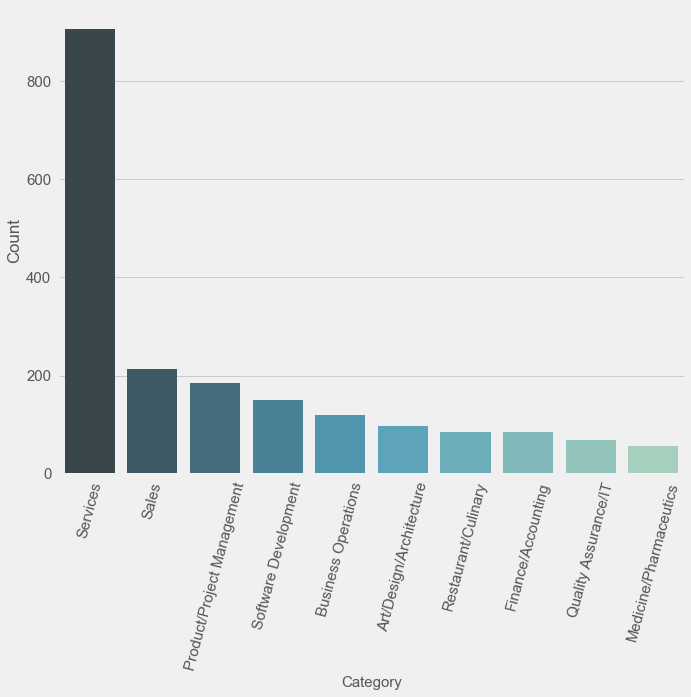

In [290]:
plt.figure(figsize=(10,8))
sns.barplot(df.Category.value_counts()[:10].index,df.Category.value_counts()[:10],palette='GnBu_d')
style.use("fivethirtyeight")
plt.xticks(rotation=75, fontsize=15)
plt.yticks(fontsize=15)
# plt.title("Top 10 Job Categories in Jobs.ge",fontsize=25)
plt.xlabel("Category",fontsize=15)
plt.ylabel("Count")
plt.show()

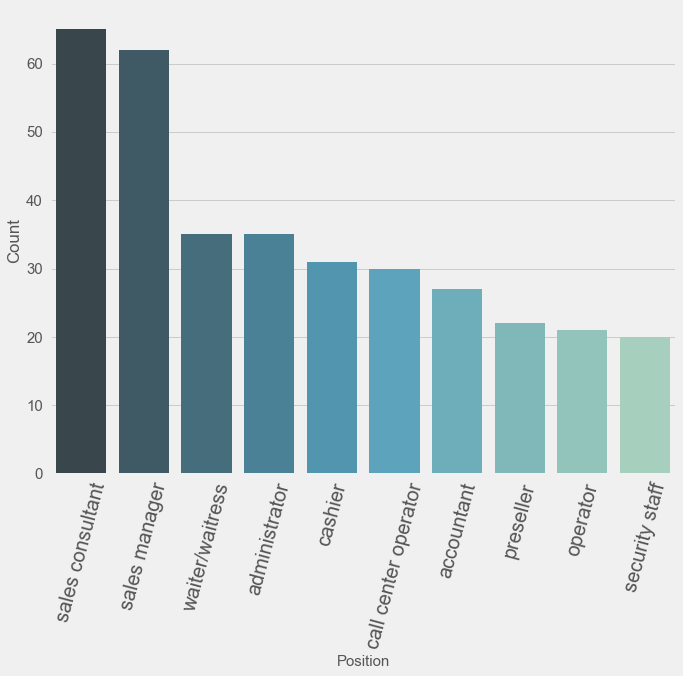

In [306]:
plt.figure(figsize=(10,8))
sns.barplot(df.Position.value_counts()[:10].index,df.Position.value_counts()[:10],palette='GnBu_d')
style.use("fivethirtyeight")
plt.xticks(rotation=75, fontsize=20)
plt.yticks(fontsize=15)
# plt.title("Top 10 Job Categories in Jobs.ge",fontsize=25)
plt.xlabel("Position",fontsize=15)
plt.ylabel("Count")
plt.show()

In [237]:
category=df[df.Category=='Software Development']
category.Position.value_counts()[:10]

Front-End Developer    7
Java Developer         6
Engineer               5
Developer              5
Back-End Developer     4
Android Developer      4
Technician             4
PHP Developer          3
iOS Developer          3
Angular Developer      3
Name: Position, dtype: int64

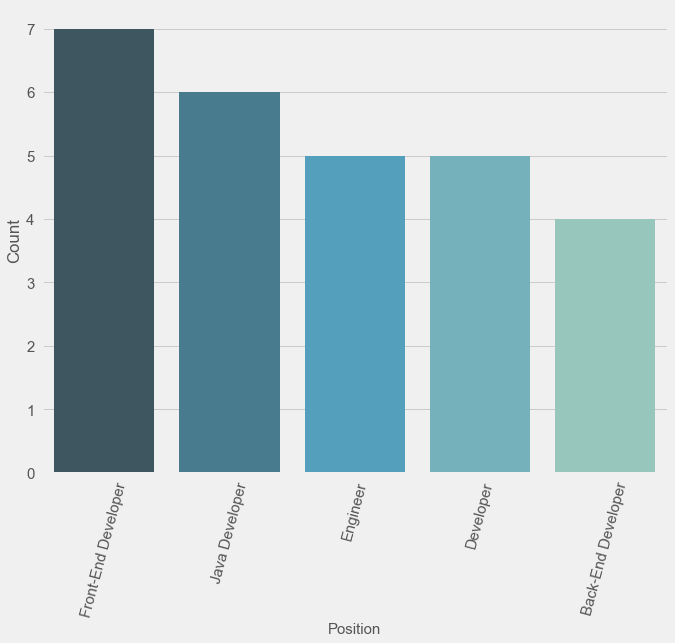

In [291]:
plt.figure(figsize=(10,8))
sns.barplot(category.Position.value_counts()[:5].index,category.Position.value_counts()[:5],palette='GnBu_d')
style.use("fivethirtyeight")
plt.xticks(rotation=75, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Position",fontsize=15)
plt.ylabel("Count")
plt.show()

In [280]:
business=df[df.Category=='Business Operations']
business.Position.value_counts()[:5]

HR Manager              5
HR Specialist           4
Supplier                3
Logistics Manager       3
Logistics Specialist    2
Name: Position, dtype: int64

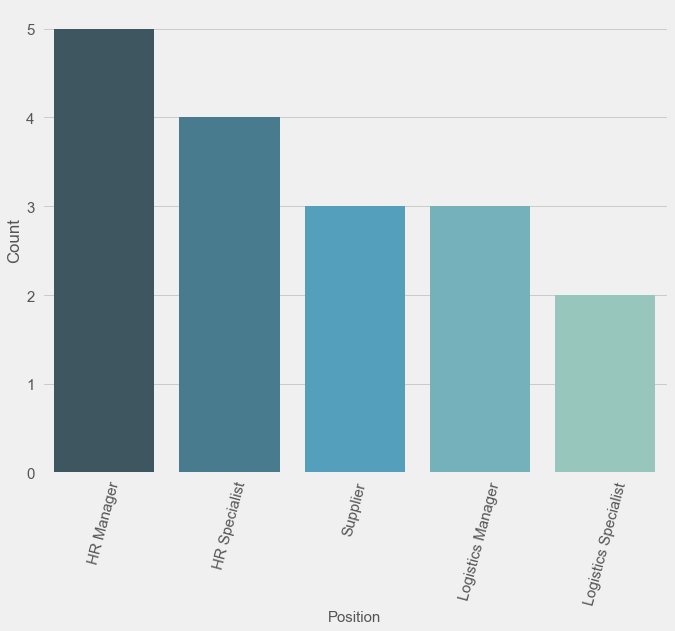

In [292]:
plt.figure(figsize=(10,8))
sns.barplot(business.Position.value_counts()[:5].index,business.Position.value_counts()[:5],palette='GnBu_d')
style.use("fivethirtyeight")
plt.xticks(rotation=75, fontsize=15)
plt.yticks(fontsize=15)
# plt.title("Top Positions in Software Development Jobs.ge",fontsize=25)
plt.xlabel("Position",fontsize=15)
plt.ylabel("Count")
plt.show()

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(df.Category.value_counts()[:10].index,df.Category.value_counts()[:10],palette='GnBu_d')
style.use("fivethirtyeight")
plt.xticks(rotation=40, fontsize=15)
plt.yticks(fontsize=15)
plt.title("Top 10 Job Categories in Jobs.ge",fontsize=25)
plt.xlabel("Category",fontsize=15)
plt.ylabel("Count")
plt.show()

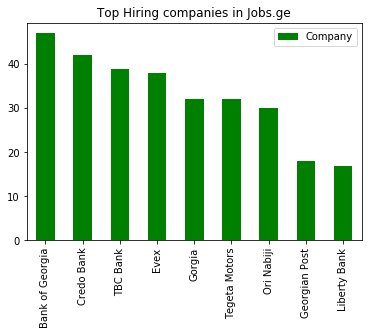

In [132]:
tb.Company.value_counts()[1:10].plot.bar(title='Top Hiring companies in Jobs.ge',legend=True,colors=['g']); #Bank of Georgia, TBC Bank and Credo Bank have the highest number of job postings

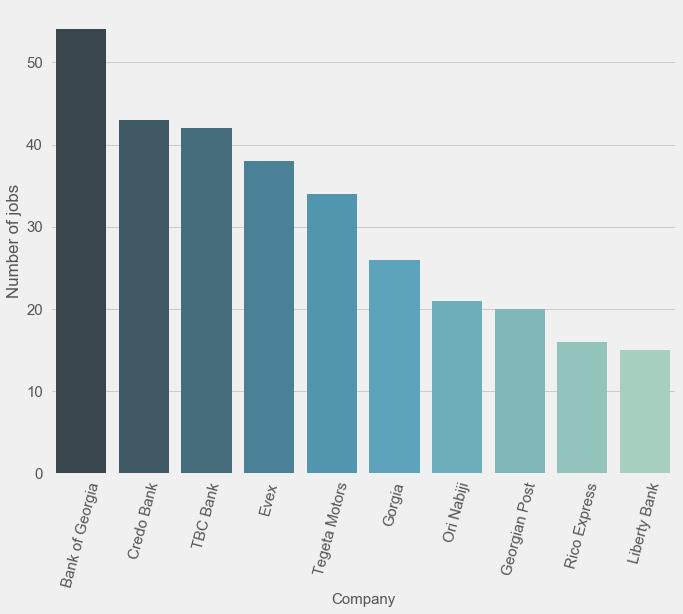

In [288]:
plt.figure(figsize=(10,8))
sns.barplot(df.Company.value_counts()[1:11].index,df.Company.value_counts()[:10],palette='GnBu_d')
style.use("fivethirtyeight")
plt.xticks(rotation=75,fontsize=15)
plt.yticks(fontsize=15)
# plt.title("Top Hiring companies in Jobs.ge",fontsize=25)
plt.xlabel("Company",fontsize=15)
plt.ylabel("Number of jobs")
plt.show()

In [127]:
?df.plot

In [64]:
bank_of_georgia=tb[tb.Company=='Bank of Georgia']
bank_of_georgia.Category.value_counts()

Business Operations           11
Software Development           9
Services                       5
Art/Design/Architecture        4
Data Analytics                 4
Category                       4
Sales                          3
Banking/Investment             2
Product/Project Management     2
Legal                          2
Research/Analytics             1
Name: Category, dtype: int64

In [65]:
bank_of_georgia=tb[tb.Company=='Company']
bank_of_georgia.Category.value_counts()

Services                      20
Other                         12
Business Operations            8
Category                       7
Sales                          5
Software Development           4
Restaurant/Culinary            3
Quality Assurance/IT           3
Product/Project Management     2
Marketing/PR                   2
Finance/Accounting             2
Education/Training             1
Medicine/Pharmaceutics         1
Legal                          1
Art/Design/Architecture        1
Linguistics/Translation        1
Name: Category, dtype: int64

In [66]:
tbc_bank=tb[tb.Company=='TBC Bank']
tbc_bank.Category.value_counts()

Business Operations           16
Software Development           7
Sales                          4
Services                       3
Data Analytics                 2
Banking/Investment             2
Research/Analytics             1
Art/Design/Architecture        1
Product/Project Management     1
Category                       1
Quality Assurance/IT           1
Name: Category, dtype: int64

In [67]:
credo_bank=tb[tb.Company=='Credo Bank']
credo_bank.Category.value_counts()

Banking/Investment      21
Quality Assurance/IT     7
Tourism                  5
Business Operations      3
Services                 2
Legal                    2
Data Analytics           1
Sales                    1
Name: Category, dtype: int64

In [68]:
bank_of_georgia=tb[tb.Company=='Tegeta Motors']
bank_of_georgia.Category.value_counts()

Business Operations           8
Services                      7
Category                      6
Product/Project Management    4
Sales                         2
Marketing/PR                  2
Quality Assurance/IT          1
Conent Writing                1
Finance/Accounting            1
Name: Category, dtype: int64

In [69]:
evex=tb[tb.Company=='Evex']
evex.Category.value_counts()

Medicine/Pharmaceutics        19
Business Operations            9
Product/Project Management     4
Category                       3
Quality Assurance/IT           1
Services                       1
Finance/Accounting             1
Name: Category, dtype: int64

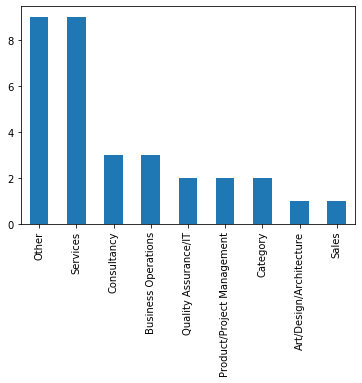

In [115]:
bank_of_georgia=tb[tb.Company=='Gorgia']
bank_of_georgia.Category.value_counts()

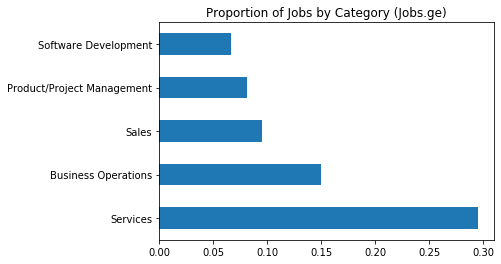

In [114]:
df['Category'].value_counts(normalize=True)[:5].plot(kind='barh', sort_columns=True, title="Proportion of Jobs by Category (Jobs.ge)")

Services field accounts for the highest proportion of the job postings, followed by business operations, sales, product/progect management and software development.

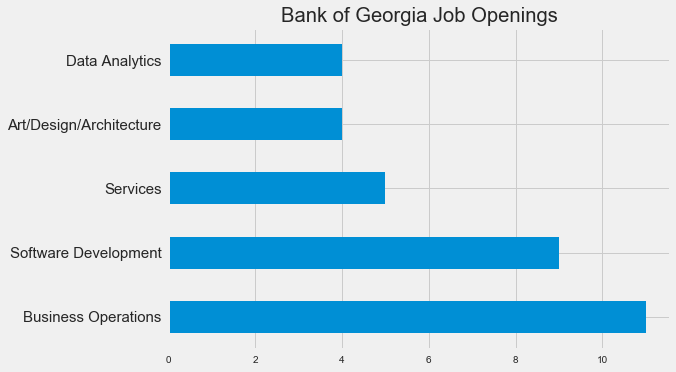

In [182]:
bank_of_georgia=df[df.Company=='Bank of Georgia'] #proportion of job openings for each company by job category
bank_of_georgia.Category.value_counts()[:5].plot(kind='barh', title = 'Bank of Georgia Job Openings');
plt.yticks(fontsize=15);

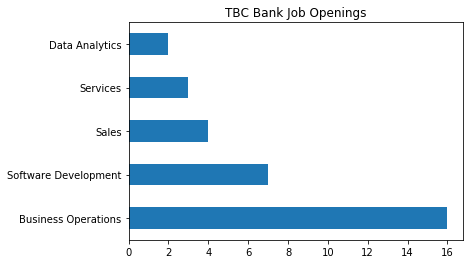

In [74]:
tbc_bank=df[df.Company=='TBC Bank'] #proportion of job openings for each company by job category
tbc_bank.Category.value_counts()[:5].plot(kind='barh', title = 'TBC Bank Job Openings')

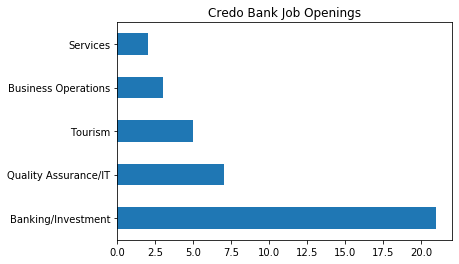

In [75]:
credo_bank=df[df.Company=='Credo Bank'] #proportion of job openings for each company by job category
credo_bank.Category.value_counts()[:5].plot(kind='barh', title = 'Credo Bank Job Openings')

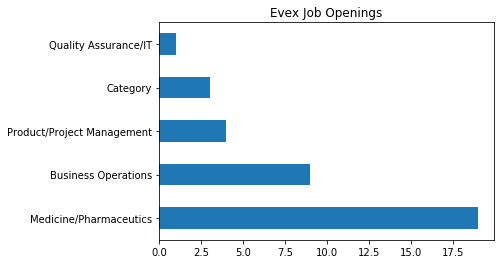

In [76]:
evex=tb[tb.Company=='Evex'] #proportion of job openings for each company by job category
evex.Category.value_counts()[:5].plot(kind='barh', title = 'Evex Job Openings')

In [298]:
df.Position = df.Position.str.lower()

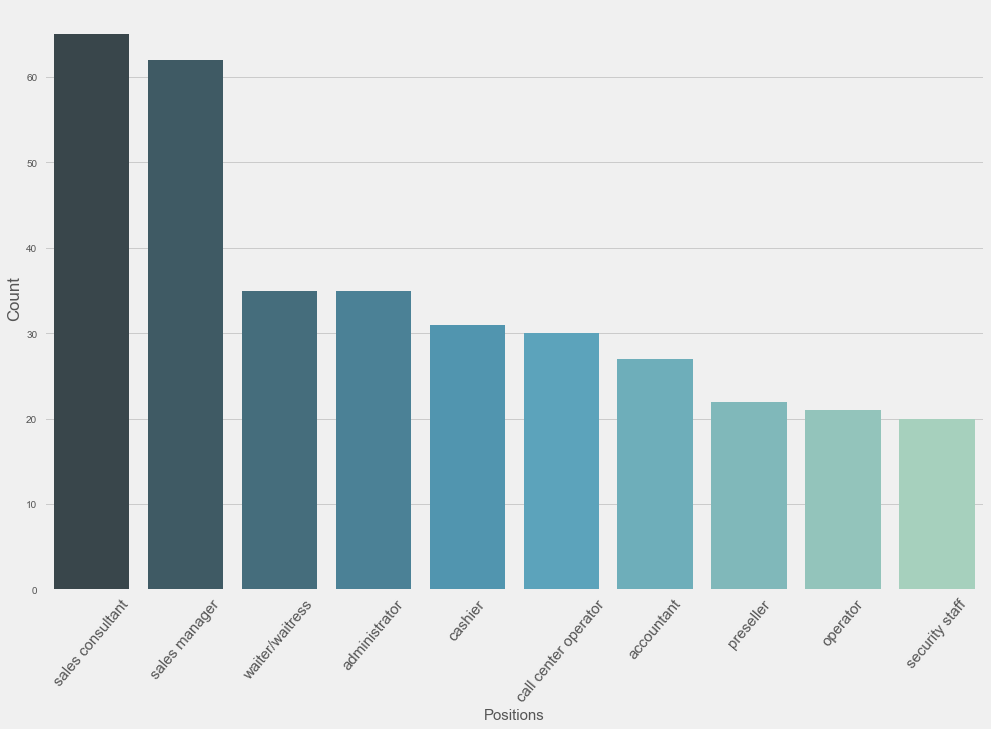

In [304]:
plt.figure(figsize=(15,10))
sns.barplot(df.Position.value_counts()[:10].index,df.Position.value_counts()[:10],palette='GnBu_d')
style.use("fivethirtyeight")
plt.xticks(rotation=50, fontsize=15)
plt.xlabel("Positions",fontsize=15)
plt.ylabel("Count")
plt.show()